# Oriented FAST and Rotated BRIEF (ORB)
Object detection is one of the most hard task in computer vision, recognize and determine location in the image. To perform this analysis, ORB will be tested. ORB is a very fast algorithm that creates feature vectors (binary vectors of pixel analysis) from the keypoints detected, since it is invariant to rotations, changes in ilumination and noise it is a good approach.

This notebook is going to show how to implement these properties to detect a person's face in an image.

## Imports and loadings
* Remember defaults opencv load is BGR, need to convert to RGB

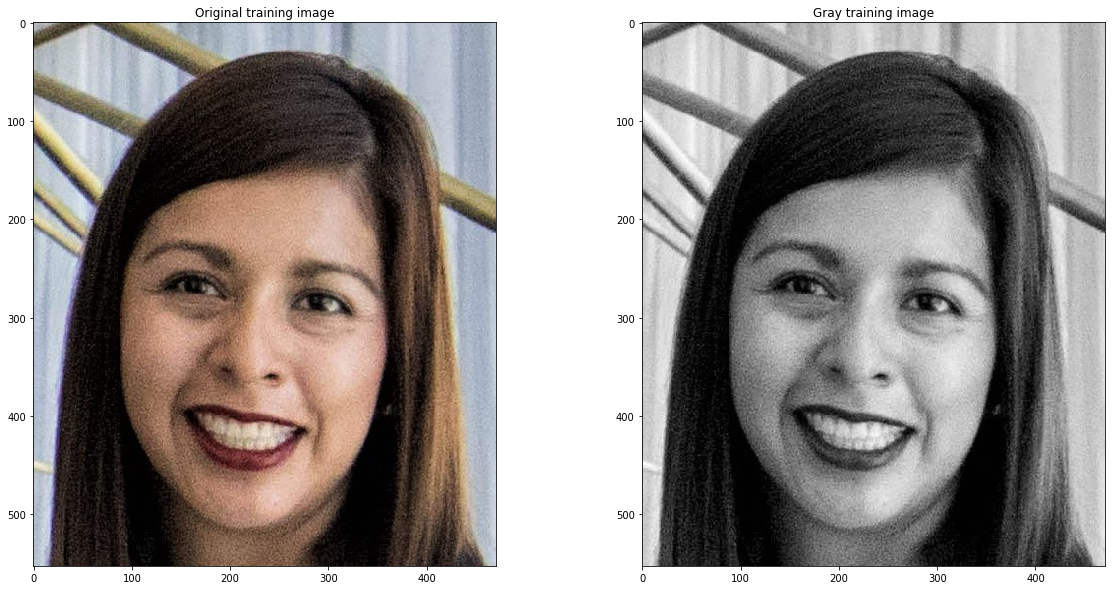

In [3]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

# Set default fig size
plt.rcParams["figure.figsize"] = [20, 10]

img = cv2.imread("images/face.jpeg")

train_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
train_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title("Original training image")
ax1.imshow(train_img)

ax2.set_title("Gray training image")
ax2.imshow(train_gray, cmap="gray");


## Locating keypoints
The first step in ORB is to locate all keypoins in the training image, after that ORB creates each binary feature vector and groups them together in the ORB descriptor.

Use OpenCV's ORB class to locate the keypoints and create the descriptor. The parameters of ORB algorithm are setup using `ORB_create()`

`cv2.ORB_create(nfeatures = 500,
                scaleFactor = 1.2,
                nlevels = 9,
                edgeThreshold = 31,
                firstLevel = 0,
                WTA_K = 2,
                scoreType = HARRIS_SCORE,
                patchSize = 31,
                fastThreshold = 20)`
                
Parameters:
* **nfeatures** - int
    Determines the max number of features (keypoints to locate).

* **scaleFactor** - float
    Pyramid decimation ratio, must be greater than 1. ORB use pyramid to find features, a factor = 2 means the classical, where each level has 4x less pixel than before. Big scale factor will reduce the number of features found.
    
* **nlevels** - int
    Number of pyramid levels

* **edgeThreshold** - int
    The size of the border where featuers are not detected. This value should be equal or greater than patchSize.
    
* **firstLevel** - int
    Determine which level should be the first level in pyramid.

* **WTA_K** - int
    The number of random pixels used to produce each element of the oriented BRIEF. Default value is 2, but can be more.
    
* **scoreType** - int
    This param can be HARRIS_SCORE or FAST_SCORE. The default is HARRIS and means that harris corner algorithm is used, the fast score usualy produces less stable keypoints (but faster).

* **patchSize** - int
    Size of the patch used by oriented BRIEF. On smaller pyramid layers the perceived image area covered by a feature will be larger.
    
Usualy nfeatures and scaleFactor are the ones to change.

Use `.detectAndCompute(img)` to locate keypoints in the training. Finally use `cv2.darwKeyPoints()` to visualize what was found by ORB.
    
